In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/NFRF ML/ElectionTweetMLData.csv')
df

,Unnamed: 0,Subjectivity,Polarity,Sentiment
0,0,0.000000,0.000000,0
1,1,0.000000,0.000000,0
2,2,0.350000,-0.100000,1
3,3,0.100000,0.100000,2
4,4,1.000000,-0.500000,1
...,...,...,...,...
3041,3041,0.000000,0.000000,0
3042,3042,0.335714,0.037500,1
3043,3043,0.500000,0.500000,2
3044,3044,0.500000,0.333333,2


In [4]:
df

,Unnamed: 0,Subjectivity,Polarity,Sentiment
0,0,0.000000,0.000000,0
1,1,0.000000,0.000000,0
2,2,0.350000,-0.100000,1
3,3,0.100000,0.100000,2
4,4,1.000000,-0.500000,1
...,...,...,...,...
3041,3041,0.000000,0.000000,0
3042,3042,0.335714,0.037500,1
3043,3043,0.500000,0.500000,2
3044,3044,0.500000,0.333333,2


In [5]:
#Using DataFrame.drop() method.
df2=df.drop(df.columns[0], axis=1)
df2

,Subjectivity,Polarity,Sentiment
0,0.000000,0.000000,0
1,0.000000,0.000000,0
2,0.350000,-0.100000,1
3,0.100000,0.100000,2
4,1.000000,-0.500000,1
...,...,...,...
3041,0.000000,0.000000,0
3042,0.335714,0.037500,1
3043,0.500000,0.500000,2
3044,0.500000,0.333333,2


In [6]:
X=df2.iloc[:,:2].values
X

array([[ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.35      , -0.1       ],
       ...,
       [ 0.5       ,  0.5       ],
       [ 0.5       ,  0.33333333],
       [ 0.4875    ,  0.075     ]])

In [7]:
Y=df2.iloc[:,2:].values
Y

array([[0],
       [0],
       [1],
       ...,
       [2],
       [2],
       [2]])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [9]:
# create a support vector machine model
model = SVC()

In [10]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [11]:
# Make predictions on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1_micro = f1_score(y_test, y_pred, average='micro')
recall_micro = recall_score(y_test, y_pred, average='micro')
precision_micro = precision_score(y_test, y_pred, average='micro')

In [12]:
print(f'Test accuracy: {accuracy}')
print(f'Test f1 score: {f1_micro}')
print(f'Test recall: {recall_micro}')
print(f'Test precision: {precision_micro}')

Test accuracy: 0.8934426229508197
Test f1 score: 0.8934426229508197
Test recall: 0.8934426229508197
Test precision: 0.8934426229508197


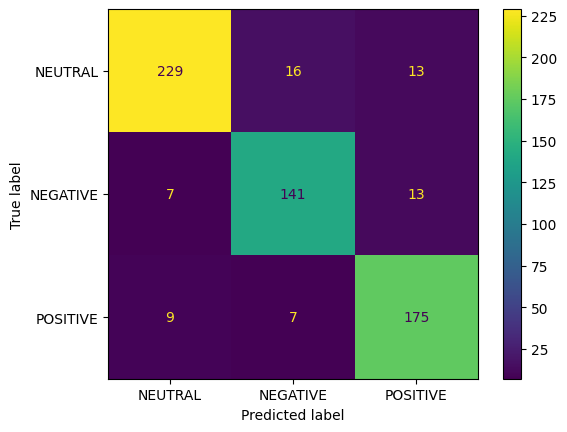

In [13]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['NEUTRAL','NEGATIVE','POSITIVE'])
disp.plot()
plt.show()

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       258
           1       0.86      0.88      0.87       161
           2       0.87      0.92      0.89       191

    accuracy                           0.89       610
   macro avg       0.89      0.89      0.89       610
weighted avg       0.89      0.89      0.89       610

